# LE PRINCIPE
## Sur la base des infos récupérée depuis  mon compte instagram (environ 2800 photos), repérer les indicateurs qui favorisent le succès et la viralité d'une photo
## Mode opératoire : 
1. liste des indicateurs à traiter pour juger de la viralité d’une photo (likes, heure, caractéristiques de la photo, etc)
2. extraction et mise en schéma BDD relationnel / transactionnel des données Instagram fournis en json
3. benchark et choix d’un modèle externe de reconnaissance et de description technique d’image
4. EDA et évaluation qualitative des données récoltées (distribution, écarts types et remplissage)
5. construction de bases bronze, intermédiaires et décisionnels
6. Création , calcul et alimentation d’un score de viralité (mix entre audience, like, commentaires, etc
7. Intégration du modèle de description des images et alimentation de la feature créée
8. Description & diagnostics : premiers dashboards sur les photos les plus virales et corrélations 
9. exploration des modèles d’entrainement sur dataiku et lancement de premiers modèles sur le feature Score de viralité pios évaluation de ceux ci
10. conception de l’application web AITAKESMYPHOTO V2 qui consiste à obtenir un score sur une photo uploadeé

### : hypothèse
: le succès d'une photo dépend de paramètres tels que le moment de la journée de la publication et les caracteristiques de la photo
### Les données requises et disponibles via API pour calculer et prédire la viralité des photos
1. reach	: Comptes touchés	Le nombre de comptes uniques qui ont vu cette publication (pour calculer la viralité)
2. likes : Le nombre de J’aime sur votre publication (pour calculer la viralité)
3. timestamp : la date et l'heure à laquelle la publication a été faite (pour prédire la viralité)
### Les données caracteristiques des photos qu'il va falloir alimenter via des bibliohtèques externes
4. colorimétrie : si une photo est en couleur ou en noir et blanc (pour prédire la viralité)
5. people : si une photo contient des personnes (portraits ou groupe) ou non (pour prédire la viralité)



## obtention des tokens longs d'acces sur meta for developpers
obligatoire pour accéder aux stats

In [1]:
# import necessary libraries
import requests
import pandas as pd
import seaborn as sns
import plotly.express as px



In [2]:
app_id = "869249382323835"
app_secret = "9e29db9082aaf35a8e74fa72f169069b"
short_lived_token = "EAAMWkZBSnlnsBQCaFP4KJAm2l5ZAVDTRfSfWRq9x1w6DeHsmw4G3xdqVPZAwgLdM3rmunluYeQLIEl4YwEPElqSrQ0H81DcGZB8QCB0eOsmVHCrk1XImPfjGLEEW4pi4rvrPcPrHyiV4uooRioF17ezBa5hAUBsmJprMA2uXPkgAPcEj5OAvvSfZBMiqCp67JRkCUoFvWMTl5m70LJ4chiP6auv6Vb5IOqQ8SKWm785Pus5JhZC3nF4I5WT742CYnnPt4wL5hPjv9msT5mUY3SOQZDZD"

url = f"https://graph.facebook.com/v18.0/oauth/access_token?grant_type=fb_exchange_token&client_id={app_id}&client_secret={app_secret}&fb_exchange_token={short_lived_token}"

response = requests.get(url)
long_lived_token = response.json().get("access_token")

print("Token long :", long_lived_token)


Token long : None


In [3]:
access_token = "EAAMWkZBSnlnsBQB37Rgp9iR1c4GcRBR5aAtYlNpCaQTX27SLBAZCZB0fAlgE7T30PjRiYaUCvce8V33EtEU2SPzrlKokZChnNwNrP6Qqd7IZBrQPH6z19kPJ25CpWBvMswdixjzZCwvvZAdKhOSZA1ZCtthjYcNu9W1zWlWaBfuuiSsoNgcdCNVEMttvJGICZAxwZDZD"
app_id = "869249382323835"
app_secret = "9e29db9082aaf35a8e74fa72f169069b"
debug_url = f"https://graph.facebook.com/debug_token?input_token={access_token}&access_token={app_id}|{app_secret}"

response = requests.get(debug_url)
print(response.json())


{'data': {'app_id': '869249382323835', 'type': 'USER', 'application': 'aitakesmyphotos', 'data_access_expires_at': 1773567588, 'expires_at': 1770975588, 'is_valid': True, 'issued_at': 1765791606, 'scopes': ['pages_show_list', 'business_management', 'instagram_basic', 'instagram_manage_comments', 'instagram_manage_insights', 'instagram_content_publish', 'instagram_manage_messages', 'pages_read_engagement', 'public_profile'], 'granular_scopes': [{'scope': 'pages_show_list', 'target_ids': ['462116367250213']}, {'scope': 'business_management', 'target_ids': ['1937774822908663']}, {'scope': 'instagram_basic', 'target_ids': ['17841400567371705']}, {'scope': 'instagram_manage_comments', 'target_ids': ['17841400567371705']}, {'scope': 'instagram_manage_insights', 'target_ids': ['17841400567371705']}, {'scope': 'instagram_content_publish', 'target_ids': ['17841400567371705']}, {'scope': 'instagram_manage_messages', 'target_ids': ['17841400567371705']}, {'scope': 'pages_read_engagement', 'target

## 1ers essais avec le graph api de instagram
### on va d'abord simplement récupérer les photos et les infos basiques (likes,timestamp, etc)

### essai sans boucle (les 1ers 25 posts)

In [4]:
# remplacez par votre jeton d'accès et ID utilisateur
access_token = "EAAMWkZBSnlnsBQB37Rgp9iR1c4GcRBR5aAtYlNpCaQTX27SLBAZCZB0fAlgE7T30PjRiYaUCvce8V33EtEU2SPzrlKokZChnNwNrP6Qqd7IZBrQPH6z19kPJ25CpWBvMswdixjzZCwvvZAdKhOSZA1ZCtthjYcNu9W1zWlWaBfuuiSsoNgcdCNVEMttvJGICZAxwZDZD"
ig_user_id = "17841400567371705"

In [5]:
url = f"https://graph.facebook.com/v18.0/{ig_user_id}/media?fields=id,caption,media_type,media_url,like_count,comments_count,timestamp&access_token={access_token}"
response = requests.get(url)
data = response.json()

In [ ]:
print(data)

In [7]:
posts = pd.DataFrame(data['data'])


In [7]:
posts.to_csv('instagram_posts.csv', index=False)


## extraction & enrichissement de la dataset sur les stats insta 
### (end points : "https://graph.facebook.com/v18.0/{ig_user_id}/media & "https://graph.facebook.com/v18.0/{ig_user_id}/insights)

### boucle pour récupérer la totalité via la pagination

In [8]:
access_token = "EAAMWkZBSnlnsBQB37Rgp9iR1c4GcRBR5aAtYlNpCaQTX27SLBAZCZB0fAlgE7T30PjRiYaUCvce8V33EtEU2SPzrlKokZChnNwNrP6Qqd7IZBrQPH6z19kPJ25CpWBvMswdixjzZCwvvZAdKhOSZA1ZCtthjYcNu9W1zWlWaBfuuiSsoNgcdCNVEMttvJGICZAxwZDZD"
ig_user_id = "17841400567371705"
all_posts = []
url = f"https://graph.facebook.com/v18.0/{ig_user_id}/media?fields=id,caption,media_type,media_url,like_count,comments_count,timestamp&access_token={access_token}"

while True:
    response = requests.get(url)
    data = response.json()
    all_posts.extend(data['data'])

    # Vérifier s'il y a une page suivante
    if 'paging' in data and 'next' in data['paging']:
        url = data['paging']['next']  # Mettre à jour l'URL avec le curseur de pagination
    else:
        break  # Plus de pages disponibles

print(f"Nombre total de posts récupérés : {len(all_posts)}")


Nombre total de posts récupérés : 3026


In [9]:
all_posts

[{'id': '18087423094844801',
  'caption': '[I DREAMED YOU DREAMED ABOUT ME] - a short vision of my last vacation to Gdansk - mostly planes and views from indoors \n#bw #portra400 #canona1 #analogphotography #filmphotography #grainy',
  'media_type': 'CAROUSEL_ALBUM',
  'media_url': 'https://scontent-cdg4-2.cdninstagram.com/v/t51.82787-15/611381431_18553768501018913_6994416883634343395_n.jpg?stp=dst-jpg_e35_tt6&_nc_cat=100&ccb=7-5&_nc_sid=18de74&efg=eyJlZmdfdGFnIjoiQ0FST1VTRUxfSVRFTS5iZXN0X2ltYWdlX3VybGdlbi5DMyJ9&_nc_ohc=RhfYwIzifdIQ7kNvwE8qBdS&_nc_oc=Adm0Oi0oQ60rQwyFMM0l-a15XRntGJbUGGeteBC10OE9vMKqzjUHtPwEFaPa4aUW5Fi3EFRSRn1444lZtQh7hs5g&_nc_zt=23&_nc_ht=scontent-cdg4-2.cdninstagram.com&edm=AM6HXa8EAAAA&_nc_gid=FMqi3632Z6enqLgd2WzlTg&oh=00_Afoka2eHVonh-LJ2xq2V04I3jEX6xam2sM7bn7eDYCH0hw&oe=6962167A',
  'like_count': 5,
  'comments_count': 2,
  'timestamp': '2026-01-03T16:27:48+0000'},
 {'id': '18068260613395880',
  'caption': '@lecercledesartistes @kiff_et_marais @centresocioculturelcer

In [10]:
df = pd.DataFrame(all_posts)


In [11]:
df

,id,caption,media_type,media_url,like_count,comments_count,timestamp
0,18087423094844801,[I DREAMED YOU DREAMED ABOUT ME] - a short vis...,CAROUSEL_ALBUM,https://scontent-cdg4-2.cdninstagram.com/v/t51...,5,2,2026-01-03T16:27:48+0000
1,18068260613395880,@lecercledesartistes @kiff_et_marais @centreso...,VIDEO,https://scontent-cdg4-1.cdninstagram.com/o1/v/...,17,3,2025-12-30T22:44:26+0000
2,18070953119380643,[LE TIERS TEMPS] [Archives 2023]- \nPour ce de...,CAROUSEL_ALBUM,https://scontent-cdg4-1.cdninstagram.com/v/t51...,13,0,2025-12-26T16:32:54+0000
3,17930993310150218,[LE DÉSERT DE NOUS MÊME] - « le confident chat...,IMAGE,https://scontent-cdg4-3.cdninstagram.com/v/t51...,17,0,2025-12-18T12:42:39+0000
4,18080626858916428,[MOR-SURE] - siècle obscur à la vitesse de la ...,VIDEO,https://scontent-cdg4-3.cdninstagram.com/o1/v/...,8,0,2025-12-12T22:11:47+0000
...,...,...,...,...,...,...,...
3021,17843103157018913,Shine à light,IMAGE,https://scontent-cdg4-2.cdninstagram.com/v/t51...,0,0,2013-12-14T14:26:04+0000
3022,17843103145018913,Dusk already,IMAGE,https://scontent-cdg4-1.cdninstagram.com/v/t51...,2,0,2013-12-14T14:15:14+0000
3023,17843103142018913,Bonne prise aux buttes,IMAGE,https://scontent-cdg4-3.cdninstagram.com/v/t51...,0,0,2013-12-14T14:09:15+0000
3024,17843103139018913,Under the bridge,IMAGE,https://scontent-cdg4-2.cdninstagram.com/v/t51...,3,2,2013-12-14T14:04:21+0000


In [12]:
df.to_csv('instagram_all_posts.csv', index=False)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3024 entries, 0 to 3023
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              3024 non-null   object
 1   caption         2686 non-null   object
 2   media_type      3024 non-null   object
 3   media_url       3024 non-null   object
 4   like_count      3024 non-null   int64 
 5   comments_count  3024 non-null   int64 
 6   timestamp       3024 non-null   object
dtypes: int64(2), object(5)
memory usage: 165.5+ KB


### Exemple d'exctraction de données virales sur un post (18022210724784825) via l'appel insight

In [14]:
post_id = 18022210724784825
urlinsight = f"https://graph.facebook.com/v18.0/{post_id}/insights?metric=reach,likes,comments,shares,saved&access_token={access_token}"
response = requests.get(urlinsight)


In [15]:
response

<Response [200]>

In [16]:
datainsight = response.json()
datainsight


{'data': [{'name': 'reach',
   'period': 'lifetime',
   'values': [{'value': 93}],
   'title': 'Comptes touchés',
   'description': 'Le nombre de comptes uniques qui ont vu cette publication au moins une fois. La couverture est différente des impressions, qui peuvent inclure plusieurs vues de votre publication par les mêmes comptes. Cet indicateur est une estimation.',
   'id': '18022210724784825/insights/reach/lifetime'},
  {'name': 'likes',
   'period': 'lifetime',
   'values': [{'value': 17}],
   'title': 'J’aime',
   'description': 'Le nombre de J’aime sur votre publication.',
   'id': '18022210724784825/insights/likes/lifetime'},
  {'name': 'comments',
   'period': 'lifetime',
   'values': [{'value': 0}],
   'title': 'Commentaires',
   'description': 'Le nombre de commentaires sur votre publication.',
   'id': '18022210724784825/insights/comments/lifetime'},
  {'name': 'shares',
   'period': 'lifetime',
   'values': [{'value': 0}],
   'title': 'Partages',
   'description': 'Le nom

In [17]:
df_insight = pd.DataFrame(datainsight['data'])
df_insight

,name,period,values,title,description,id
0,reach,lifetime,[{'value': 93}],Comptes touchés,Le nombre de comptes uniques qui ont vu cette ...,18022210724784825/insights/reach/lifetime
1,likes,lifetime,[{'value': 17}],J’aime,Le nombre de J’aime sur votre publication.,18022210724784825/insights/likes/lifetime
2,comments,lifetime,[{'value': 0}],Commentaires,Le nombre de commentaires sur votre publication.,18022210724784825/insights/comments/lifetime
3,shares,lifetime,[{'value': 0}],Partages,Le nombre de partages de votre publication.,18022210724784825/insights/shares/lifetime
4,saved,lifetime,[{'value': 0}],Enregistré,Le nombre d’enregistrements de votre publication.,18022210724784825/insights/saved/lifetime


In [18]:
df_insight['name']

0       reach
1       likes
2    comments
3      shares
4       saved
Name: name, dtype: object

### création d'une dataset "Insights" à part pour les reach et shared par post

In [ ]:
access_token = "EAAMWkZBSnlnsBQB37Rgp9iR1c4GcRBR5aAtYlNpCaQTX27SLBAZCZB0fAlgE7T30PjRiYaUCvce8V33EtEU2SPzrlKokZChnNwNrP6Qqd7IZBrQPH6z19kPJ25CpWBvMswdixjzZCwvvZAdKhOSZA1ZCtthjYcNu9W1zWlWaBfuuiSsoNgcdCNVEMttvJGICZAxwZDZD"
ig_user_id = "17841400567371705"


# 1. Récupérer tous les posts (pour obtenir les IDs et timestamps)
all_posts = []
url = f"https://graph.facebook.com/v18.0/{ig_user_id}/media?fields=id,timestamp&access_token={access_token}"

while True:
    response = requests.get(url)
    data = response.json()
    all_posts.extend(data['data'])
    if 'paging' in data and 'next' in data['paging']:
        url = data['paging']['next']
    else:
        break

print(f"Nombre total de posts : {len(all_posts)}")

# 2. Créer une liste pour stocker les insights
insights_data = []

# 3. Récupérer reach et shares pour chaque post
for post in all_posts:
    post_id = post['id']
    timestamp = post.get('timestamp', 'inconnu')
    insights_url = f"https://graph.facebook.com/v18.0/{post_id}/insights?metric=reach,shares&access_token={access_token}"
    response = requests.get(insights_url)
    data = response.json()

    # Vérifier si la réponse contient une erreur
    if 'error' in data:
        error_msg = data['error'].get('error_user_msg', data['error'].get('message', 'Erreur inconnue'))
        print(f"Erreur pour le post {post_id} (publié le {timestamp}): {error_msg}")
        insights_data.append({
            'post_id': post_id,
            'timestamp': timestamp,
            'reach': None,
            'shares': None,
            'error': error_msg
        })
    else:
        # Extraire reach et shares
        reach = None
        shares = None
        if 'data' in data:
            for metric in data['data']:
                if metric['name'] == 'reach':
                    reach = metric['values'][0]['value'] if metric['values'] else None
                elif metric['name'] == 'shares':
                    shares = metric['values'][0]['value'] if metric['values'] else None

        insights_data.append({
            'post_id': post_id,
            'timestamp': timestamp,
            'reach': reach,
            'shares': shares,
            'error': None
        })

    time.sleep(0.5)  # Délai pour éviter les limites de taux




In [7]:
df_insights = pd.DataFrame(insights_data)


In [8]:
df_insights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023 entries, 0 to 3022
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   post_id    3023 non-null   object 
 1   timestamp  3023 non-null   object 
 2   reach      1885 non-null   float64
 3   shares     1885 non-null   float64
 4   error      1138 non-null   object 
dtypes: float64(2), object(3)
memory usage: 118.2+ KB


### conversion des 2 colonnes reach et shares en entier

In [ ]:
df_insights['reach'] = df['reach'].astype(float).astype('Int')
df_insights['shares'] = df['shares'].astype(float).astype('Int')

In [9]:
df_insights["reach"].describe()

count    1885.000000
mean       18.280637
std       118.293099
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max      4734.000000
Name: reach, dtype: float64

In [34]:
df_insights.to_csv('instagram_insights_reach_shares.csv', index=False)

## Enrichissement sur les photos via les modules : caracteristiques
modèles pré-entraînés de bibliothèques comme OpenCV, Pillow (PIL), et TensorFlow/Keras 

### noir et blanc

In [35]:
import requests
from PIL import Image
import io

def download_image(url):
    response = requests.get("https://scontent-cdg4-3.cdninstagram.com/v/t51.82787-15/584095451_18544144747018913_3702073192636127557_n.jpg?stp=dst-jpg_e35_tt6&_nc_cat=110&ccb=7-5&_nc_sid=18de74&efg=eyJlZmdfdGFnIjoiRkVFRC5iZXN0X2ltYWdlX3VybGdlbi5DMyJ9&_nc_ohc=2I8Xs9gjEOMQ7kNvwHszW0U&_nc_oc=AdknsDlTB71KMFNY5a0iauMJW-c5hkmZP4WEpv7YJAqOQtplAXYW4iQ9oYqnE_EODsmbaz8aJraoPNM-Xa9DQ_h7&_nc_zt=23&_nc_ht=scontent-cdg4-3.cdninstagram.com&edm=AM6HXa8EAAAA&_nc_gid=YahzgR0gcT86gqixNB8M6Q&oh=00_AfjoutZPvWKFr_VlAOk8b9LGvboiDvw2_10JWnmqmf7ABg&oe=692E0E6C")
    img = Image.open(io.BytesIO(response.content))
    return img

#### tests unitaires
affiner le modèle en vérifiant si r == v == b (si oui alors l'image est en noir et blanc)

In [ ]:
from PIL import Image
import requests
import io
import numpy as np
import random

def download_image(url):
    response = requests.get(url)
    img = Image.open(io.BytesIO(response.content))
    return img

def is_grayscale_rgb(img):
    # Convertir l'image en tableau numpy
    img_array = np.array(img)

    # Vérifier que l'image est en mode RGB ou RGBA
    if img.mode not in ['RGB', 'RGBA']:
        return False

    # Obtenir les dimensions de l'image
    height, width = img_array.shape[:2]

    # Choisir 5 pixels aléatoires
    for _ in range(5):
        x = random.randint(0, width - 1)
        y = random.randint(0, height - 1)
        r, g, b = img_array[y, x][:3]  # Prendre R, G, B (ignorer A si RGBA)
        if not (r == g == b):
            return False

    # Si tous les pixels testés ont R=G=B, l'image est en noir et blanc
    return True

# Exemple d'utilisation
url = "https://scontent-cdg4-3.cdninstagram.com/v/t51.29350-15/244798696_304021361101217_3924240109032175923_n.jpg?stp=dst-jpg_e35_tt6&_nc_cat=106&ccb=7-5&_nc_sid=18de74&efg=eyJlZmdfdGFnIjoiQ0FST1VTRUxfSVRFTS5iZXN0X2ltYWdlX3VybGdlbi5DMyJ9&_nc_ohc=AwtTZUaoWI8Q7kNvwE8StBo&_nc_oc=AdnTJ3biaSh-2sJm5M2gcO3dIKzTgJt5a5ZoRExhwhXt5nKJ9YuzdoZic0ReKQ1U4MqIHvnxy58gG-EO2_-3Mcox&_nc_zt=23&_nc_ht=scontent-cdg4-3.cdninstagram.com&edm=AM6HXa8EAAAA&_nc_gid=Bwd8Q1Or4QXvUzTnuA2LuQ&oh=00_AfhpqMP5cZwWE6kXAc6vhxfue5gxLEF49bi9q_h-xWr8SA&oe=692DEE7B"
img = download_image(url)

if is_grayscale_rgb(img):
    print("L'image est en noir et blanc.")
else:
    print("L'image est en couleur.")


### boucle pour créer le dataset "dim_pics"

In [38]:
from PIL import Image
import requests
from io import BytesIO

# Fonction pour vérifier si une image est en niveaux de gris
def is_grayscale(image_url):
    try:
        response = requests.get(image_url, timeout=5)
        img = Image.open(BytesIO(response.content))
        if img.mode == 'L':  # Mode 'L' signifie niveaux de gris
            return True
        if img.mode == 'RGB':
            # Convertir en tableau numpy pour vérifier si R == G == B pour tous les pixels
            img_array = img.convert('RGB')
            pixels = list(img_array.getdata())
            # Vérifier si tous les pixels ont R == G == B
            return all(pixel[0] == pixel[1] == pixel[2] for pixel in pixels)
        return False
    except Exception as e:
        print(f"Erreur lors du traitement de l'image {image_url}: {e}")
        return False

# Filtrer les lignes où media_type est "IMAGE" ou "CAROUSEL_ALBUM"
filtered_df = df[df['media_type'].isin(['IMAGE', 'CAROUSEL_ALBUM'])]

# Créer la colonne 'colorimétrie'
filtered_df['colorimétrie'] = filtered_df['media_url'].apply(
    lambda url: "noir et blanc" if is_grayscale(url) else "couleur"
)

# Sélectionner uniquement les colonnes 'id', 'media_url' et 'colorimétrie'
dim_pics = filtered_df[['id', 'media_url', 'colorimétrie']]

# Afficher les premières lignes de la nouvelle dataframe
dim_pics.head()

/var/folders/ks/db1tl2dj5x1dcg1v_hm3qvgc0000gn/T/ipykernel_32252/194338763.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['colorimétrie'] = filtered_df['media_url'].apply(


,id,media_url,colorimétrie
1,18061340993646423,https://scontent-cdg4-3.cdninstagram.com/v/t51...,noir et blanc
2,18161262304395748,https://scontent-cdg4-3.cdninstagram.com/v/t51...,noir et blanc
3,18543670024004899,https://scontent-cdg4-2.cdninstagram.com/v/t51...,couleur
5,18022210724784825,https://scontent-cdg4-3.cdninstagram.com/v/t51...,noir et blanc
7,18367139911095022,https://scontent-cdg4-1.cdninstagram.com/v/t51...,couleur


In [39]:
dim_pics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2884 entries, 1 to 3021
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            2884 non-null   object
 1   media_url     2884 non-null   object
 2   colorimétrie  2884 non-null   object
dtypes: object(3)
memory usage: 90.1+ KB


In [40]:
dim_pics.to_csv('dim_pics1.csv', index=False)

#### checker un peu la distribution de la colorimétrie

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='colorimétrie', ylabel='count'>

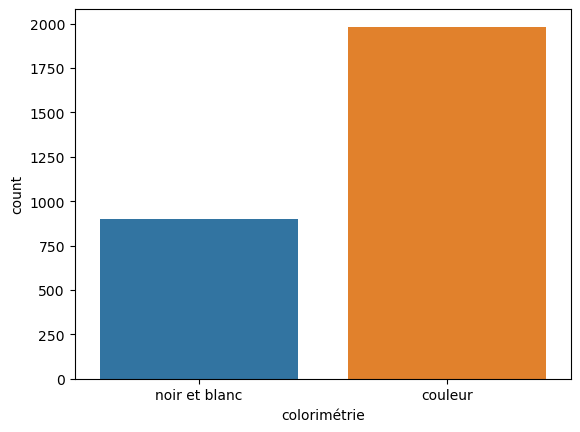

In [42]:
sns.countplot(dim_pics, x='colorimétrie', hue='colorimétrie')

### présence ou non de personnes dans les photos

#### tests unitaires

In [ ]:
import cv2

#### conversion en noir et blanc pour une détection plus rapide et ajustement de la sensibilité scaleFactor à 1.05 au lieu de 1.1

In [ ]:
# Exemple avec Haar Cascades
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

from PIL import Image
import requests
import io
import numpy as np
import random

def download_image(url):
    response = requests.get(url)
    img = Image.open(io.BytesIO(response.content))
    return img

def detect_people(img):
    gray = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    gray = cv2.equalizeHist(gray)
    faces = face_cascade.detectMultiScale(gray, 1.05, 5, minSize=(50, 50))
    if len(faces)== 1:
        print("Portrait")
    elif len(faces)> 1:
        print("Groupe ou silouhettes")
    else:
        print("pas de personnes détectées")
    return len(faces) > 0

# Exemple d'utilisation
url = "https://scontent-cdg4-2.cdninstagram.com/v/t51.29350-15/189169393_510233090100945_645662607729032261_n.jpg?stp=dst-jpg_e35_tt6&_nc_cat=107&ccb=7-5&_nc_sid=18de74&efg=eyJlZmdfdGFnIjoiQ0FST1VTRUxfSVRFTS5iZXN0X2ltYWdlX3VybGdlbi5DMyJ9&_nc_ohc=W1nMszsOIowQ7kNvwGIkFw2&_nc_oc=Admv7HegUxY4OYwhNRc_h3xg0bGii3A3GeXLo8jf7rPoyflrSFMA75yHYFRPY1XbBzV3soJB8tfH_1ANOclui-4_&_nc_zt=23&_nc_ht=scontent-cdg4-2.cdninstagram.com&edm=AM6HXa8EAAAA&_nc_gid=0q3Tb_8eR9ihTCf9fHbswA&oh=00_Afh9h54znWxH3oGDzyACtEy0DRlSn7TO4ksX4bYyEYvXvQ&oe=69336AAF"
img = download_image(url)
detect_people(img)

Groupe ou silouhettes


True

#### détection plus scricte 

In [ ]:
import cv2
import numpy as np

# Télécharger l'image depuis l'URL
def download_image(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)  # Convertir en format OpenCV (BGR)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def detect_people(img):
    gray = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    gray = cv2.equalizeHist(gray)

    faces = face_cascade.detectMultiScale(
        gray,
        scaleFactor=1.05,
        minNeighbors=5,
        minSize=(50, 50)
    )

    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

    if len(faces) == 1:
        print("Portrait")
    elif len(faces) > 1:
        print("Groupe ou silhouettes")
    else:
        print("Pas de personnes détectées")

    return len(faces) > 0

# Exemple d'utilisation
url = "https://scontent-cdg4-2.cdninstagram.com/v/t51.29350-15/189169393_510233090100945_645662607729032261_n.jpg?stp=dst-jpg_e35_tt6&_nc_cat=107&ccb=7-5&_nc_sid=18de74&efg=eyJlZmdfdGFnIjoiQ0FST1VTRUxfSVRFTS5iZXN0X2ltYWdlX3VybGdlbi5DMyJ9&_nc_ohc=W1nMszsOIowQ7kNvwGIkFw2&_nc_oc=Admv7HegUxY4OYwhNRc_h3xg0bGii3A3GeXLo8jf7rPoyflrSFMA75yHYFRPY1XbBzV3soJB8tfH_1ANOclui-4_&_nc_zt=23&_nc_ht=scontent-cdg4-2.cdninstagram.com&edm=AM6HXa8EAAAA&_nc_gid=0q3Tb_8eR9ihTCf9fHbswA&oh=00_Afh9h54znWxH3oGDzyACtEy0DRlSn7TO4ksX4bYyEYvXvQ&oe=69336AAF"
img = download_image(url)
detect_people(img)

Groupe ou silhouettes


True

### possiblesfaux positifs dans la détetion des images (environ 10 %)

### boucle pour enrichir "dim_pic"

In [ ]:
import cv2
import numpy as np
import requests
from PIL import Image
from io import BytesIO
import pandas as pd

# Fonction pour télécharger une image depuis une URL
def download_image(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

# Fonction de détection de personnes
def detect_people(img):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    gray = cv2.equalizeHist(gray)

    faces = face_cascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(50, 50)
    )

    if len(faces) == 1:
        return "Portrait"
    elif len(faces) > 1:
        return "Groupe ou silhouettes"
    else:
        return "Aucune personne détectée"

# Enrichir dim_pics avec la colonne 'people'
def enrich_dim_pics(dim_pics):
    # Ajouter la colonne 'people' à dim_pics
    dim_pics['people'] = np.nan

    # Parcourir chaque ligne de dim_pics
    for index, row in dim_pics.iterrows():
        media_url = row['media_url']

        try:
            # Télécharger l'image
            img = download_image(media_url)
            # Détecter les personnes
            result = detect_people(img)
            # Mettre à jour la colonne 'people'
            dim_pics.at[index, 'people'] = result
        except Exception as e:
            print(f"Erreur pour l'ID {row['id']}: {e}")
            dim_pics.at[index, 'people'] = "Erreur de traitement"

    return dim_pics

# Exécution : dim_pics est modifié directement
dim_pics = enrich_dim_pics(dim_pics)

# Afficher un aperçu du résultat
print(dim_pics[['id', 'media_url', 'people', 'colorimétrie']].head())


/var/folders/ks/db1tl2dj5x1dcg1v_hm3qvgc0000gn/T/ipykernel_10629/3315083048.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dim_pics['people'] = np.nan
/var/folders/ks/db1tl2dj5x1dcg1v_hm3qvgc0000gn/T/ipykernel_10629/3315083048.py:50: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Groupe ou silhouettes' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  dim_pics.at[index, 'people'] = result


                  id                                          media_url  \
0  18543670024004899  https://scontent-cdg4-2.cdninstagram.com/v/t51...   
2  18022210724784825  https://scontent-cdg4-3.cdninstagram.com/v/t51...   
4  18367139911095022  https://scontent-cdg4-1.cdninstagram.com/v/t51...   
5  18150670261423408  https://scontent-cdg4-2.cdninstagram.com/v/t51...   
6  17898706662322276  https://scontent-cdg4-1.cdninstagram.com/v/t51...   

                     people   colorimétrie  
0     Groupe ou silhouettes        couleur  
2     Groupe ou silhouettes  noir et blanc  
4  Aucune personne détectée        couleur  
5                  Portrait  noir et blanc  
6     Groupe ou silhouettes        couleur  


In [ ]:
dim_pics.to_csv('dim_pics2.csv', index=False)

In [ ]:
dim_pics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2882 entries, 0 to 3018
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            2882 non-null   object
 1   media_url     2882 non-null   object
 2   colorimétrie  2882 non-null   object
 3   people        2882 non-null   object
dtypes: object(4)
memory usage: 177.1+ KB


### librairie cv2 pas efficace. Nombreux faux positifs ou absence de détection 
Aperçu sur Looker

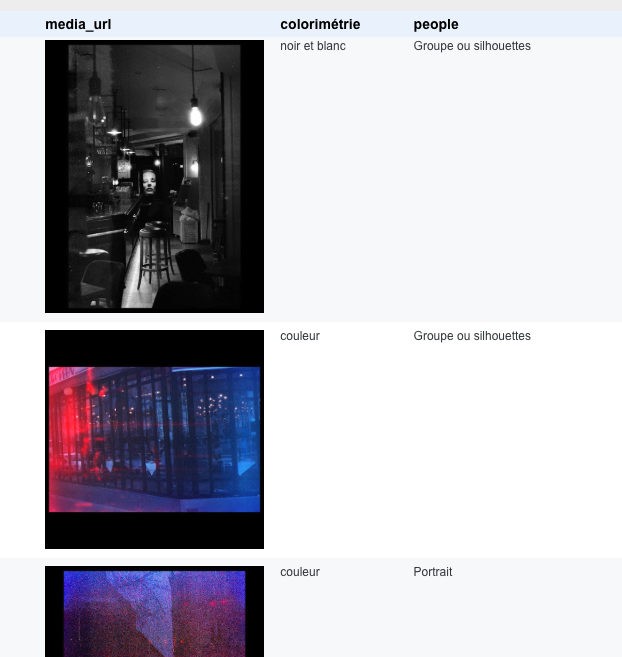

### Recherche de solutions : tests unitaires avec face recognition 

In [ ]:
import dlib
import cv2
import numpy as np
import requests
from PIL import Image
from io import BytesIO

def download_image(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

def detect_people_improved(img):
    # Prétraitement
    img = cv2.equalizeHist(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
    img = cv2.GaussianBlur(img, (5, 5), 0)
    img = cv2.convertScaleAbs(img, alpha=1.5, beta=30)

    # Détection avec Dlib
    detector = dlib.get_frontal_face_detector()
    detections = detector(img, 2)  # Upsample 2x

    if len(detections) == 1:
        return "Portrait"
    elif len(detections) > 1:
        return "Groupe ou silhouettes"
    else:
        return "Aucune personne détectée"

# Exemple d'utilisation
url = "https://scontent-cdg4-2.cdninstagram.com/v/t51.82787-15/550678834_18531604624018913_6675128158971139386_n.jpg?stp=dst-jpg_e35_tt6&_nc_cat=103&ccb=7-5&_nc_sid=18de74&efg=eyJlZmdfdGFnIjoiQ0FST1VTRUxfSVRFTS5iZXN0X2ltYWdlX3VybGdlbi5DMyJ9&_nc_ohc=E2q5jGT8tTAQ7kNvwFVlb1h&_nc_oc=AdnOA_oDD4shXBg4VN-YcFZgymatjWfx86BEK-F3DRYcTSumYNW122dCQXD9EnezbxihCGAvdEqS712R3zSwIcWz&_nc_zt=23&_nc_ht=scontent-cdg4-2.cdninstagram.com&edm=AM6HXa8EAAAA&_nc_gid=-uTKE1JniStrOdzVPQeiPQ&oh=00_Afg2wRS39VWgTF9dSpBJwfdygcBl-p6lDJmNZ0b72CyhgQ&oe=69337B0D"
img = download_image(url)
result = detect_people_improved(img)
print(result)


Aucune personne détectée


### avec dlib

In [ ]:
import dlib
import cv2

def download_image(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

# Charger le détecteur de visages CNN de Dlib
detector = dlib.cnn_face_detection_model_v1("mmod_human_face_detector.dat")

def detect_people_with_dlib(img):
    # Convertir en RGB
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Détecter les visages
    detections = detector(rgb_img, upsample_num_times=2)  # Augmenter l'upsample pour les petits visages

    if len(detections) == 1:
        return "Portrait"
    elif len(detections) > 1:
        return "Groupe ou silhouettes"
    else:
        return "Aucune personne détectée"

# Exemple d'utilisation
url = "https://scontent-cdg4-2.cdninstagram.com/v/t51.82787-15/550678834_18531604624018913_6675128158971139386_n.jpg?stp=dst-jpg_e35_tt6&_nc_cat=103&ccb=7-5&_nc_sid=18de74&efg=eyJlZmdfdGFnIjoiQ0FST1VTRUxfSVRFTS5iZXN0X2ltYWdlX3VybGdlbi5DMyJ9&_nc_ohc=E2q5jGT8tTAQ7kNvwFVlb1h&_nc_oc=AdnOA_oDD4shXBg4VN-YcFZgymatjWfx86BEK-F3DRYcTSumYNW122dCQXD9EnezbxihCGAvdEqS712R3zSwIcWz&_nc_zt=23&_nc_ht=scontent-cdg4-2.cdninstagram.com&edm=AM6HXa8EAAAA&_nc_gid=-uTKE1JniStrOdzVPQeiPQ&oh=00_Afg2wRS39VWgTF9dSpBJwfdygcBl-p6lDJmNZ0b72CyhgQ&oe=69337B0D"
img = download_image(url)
result = detect_people_improved(img)
print(result)

Aucune personne détectée


### avec yolo

In [ ]:
import cv2
import numpy as np
import requests
from PIL import Image
from io import BytesIO

# Télécharger une image depuis une URL
def download_image(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

# Charger YOLO
def load_yolo():
    net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
    with open("coco.names", "r") as f:
        classes = [line.strip() for line in f.readlines()]
    layers_names = net.getLayerNames()
    output_layers = [layers_names[i - 1] for i in net.getUnconnectedOutLayers()]
    return net, classes, output_layers

# Détecter les personnes dans une image
def detect_people_yolo(img, net, output_layers, classes):
    height, width, channels = img.shape

    # Prétraitement de l'image
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)

    # Informations sur les détections
    class_ids = []
    confidences = []
    boxes = []

    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]

            if confidence > 0.5 and classes[class_id] == "person":  # Seuil de confiance et classe "person"
                # Coordonnées de la boîte englobante
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Coordonnées du rectangle
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    # Suppression des boîtes redondantes (Non-Max Suppression)
    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

    return len(indexes)  # Nombre de personnes détectées

# Fonction principale
def detect_people_in_image(url):
    img = download_image(url)
    net, classes, output_layers = load_yolo()
    num_people = detect_people_yolo(img, net, output_layers, classes)

    if num_people == 1:
        return "Portrait"
    elif num_people > 1:
        return "Groupe ou silhouettes"
    else:
        return "Aucune personne détectée"

# Exemple d'utilisation
url = "https://scontent-cdg4-2.cdninstagram.com/v/t51.29350-15/187756574_325116435631606_6974662308841089452_n.jpg?stp=dst-jpg_e35_tt6&_nc_cat=103&ccb=7-5&_nc_sid=18de74&efg=eyJlZmdfdGFnIjoiQ0FST1VTRUxfSVRFTS5iZXN0X2ltYWdlX3VybGdlbi5DMyJ9&_nc_ohc=0KTqMtEvozUQ7kNvwE9UZuN&_nc_oc=AdmaZD1G8Ph4ZOmdYJ-EPT6BwSGGvIdRl9USRN_W8NaqZxSlL5L4471UkuubVsw5biOYl6mv--52E-Po8qO99Inx&_nc_zt=23&_nc_ht=scontent-cdg4-2.cdninstagram.com&edm=AM6HXa8EAAAA&_nc_gid=0q3Tb_8eR9ihTCf9fHbswA&oh=00_AfhxC1tC8YeynbTHzKUPgnGqJbu00LtPqoVw3o-xrzxzQQ&oe=693367CF"  # Remplace par l'URL de ton image
result = detect_people_in_image(url)
print(result)


### Yolo est la bilbiothèque la plus fiable pour détecter la présence ou non de personnes
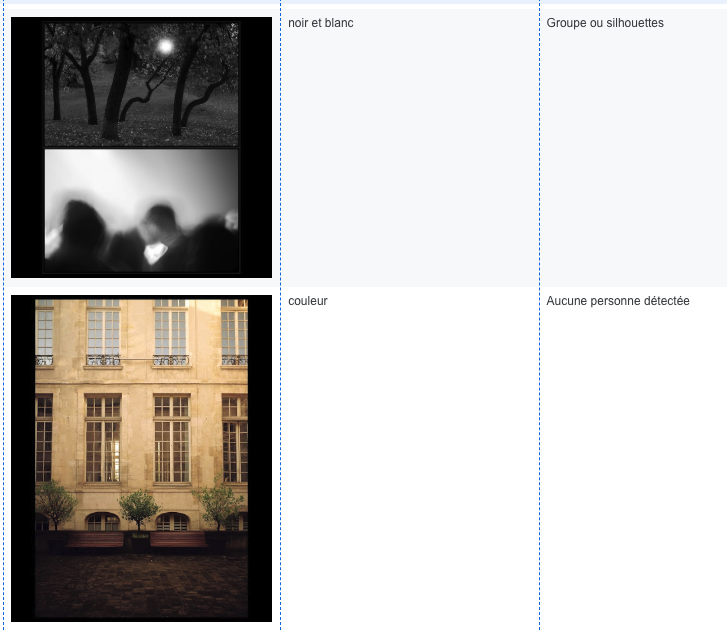
### enrichissement de la colonne people avec le modèle yolo

In [44]:
import cv2
import numpy as np
import requests
from PIL import Image
from io import BytesIO
import pandas as pd

# Fonction pour télécharger une image depuis une URL
def download_image(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

# Charger YOLOv3
def load_yolo():
    net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
    with open("coco.names", "r") as f:
        classes = [line.strip() for line in f.readlines()]
    layers_names = net.getLayerNames()
    output_layers = [layers_names[i - 1] for i in net.getUnconnectedOutLayers()]
    return net, classes, output_layers

# Détecter les personnes dans une image avec YOLOv3
def detect_people_yolo(img, net, output_layers, classes):
    height, width, channels = img.shape

    # Prétraitement de l'image
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)

    # Informations sur les détections
    class_ids = []
    confidences = []
    boxes = []

    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]

            if confidence > 0.5 and classes[class_id] == "person":
                # Coordonnées de la boîte englobante
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Coordonnées du rectangle
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    # Suppression des boîtes redondantes
    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

    return len(indexes)  # Nombre de personnes détectées

# Mettre à jour la colonne 'people' dans dim_pics
def update_dim_pics_with_yolo(dim_pics):
    # Charger YOLO une seule fois
    net, classes, output_layers = load_yolo()

    # Parcourir chaque ligne de dim_pics
    for index, row in dim_pics.iterrows():
        media_url = row['media_url']

        try:
            # Télécharger l'image
            img = download_image(media_url)
            # Détecter les personnes
            num_people = detect_people_yolo(img, net, output_layers, classes)

            # Mettre à jour la colonne 'people'
            if num_people == 1:
                dim_pics.at[index, 'people'] = "Portrait"
            elif num_people > 1:
                dim_pics.at[index, 'people'] = "Groupe ou silhouettes"
            else:
                dim_pics.at[index, 'people'] = "Aucune personne détectée"
        except Exception as e:
            print(f"Erreur pour l'URL {media_url}: {e}")
            dim_pics.at[index, 'people'] = "Erreur de traitement"

    return dim_pics

# Exemple d'utilisation
# dim_pics = pd.DataFrame(...)  # Ton DataFrame existant
dim_pics = update_dim_pics_with_yolo(dim_pics)

# Afficher un aperçu du résultat
print(dim_pics[['id', 'media_url', 'people']].head())


/var/folders/ks/db1tl2dj5x1dcg1v_hm3qvgc0000gn/T/ipykernel_32252/2365925243.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dim_pics.at[index, 'people'] = "Groupe ou silhouettes"


                  id                                          media_url  \
1  18061340993646423  https://scontent-cdg4-3.cdninstagram.com/v/t51...   
2  18161262304395748  https://scontent-cdg4-3.cdninstagram.com/v/t51...   
3  18543670024004899  https://scontent-cdg4-2.cdninstagram.com/v/t51...   
5  18022210724784825  https://scontent-cdg4-3.cdninstagram.com/v/t51...   
7  18367139911095022  https://scontent-cdg4-1.cdninstagram.com/v/t51...   

                     people  
1     Groupe ou silhouettes  
2                  Portrait  
3     Groupe ou silhouettes  
5                  Portrait  
7  Aucune personne détectée  


In [45]:
dim_pics.to_csv('dim_pics3.csv', index=False)

## Nettoyage & opti des tables

### ajout d'ids incrémentiels sur le dim
### utile notamment si on veut plus tard créer une table décisionnelle

In [55]:
dim_insights = df_insights

In [56]:
dim_posts = df

### ajout d'un id incrémentiel

In [81]:
dim_insights = dim_insights.reset_index()

In [92]:
dim_posts = dim_posts.reset_index()

In [93]:
dim_insights = dim_insights.rename(columns={'index': 'id_dim_insights'})

In [100]:
dim_posts = dim_posts.rename(columns={'id_dim_insights': 'id_dim_posts'})

In [94]:
dim_pics = dim_pics.rename(columns={'index': 'id_dim_pics'})

In [ ]:
dim_posts.info()
dim_insights.info()
dim_pics.info()